# Exploratory Data Analysis: Phone Brands/Models

In [1]:
import pandas as pd
from datetime import datetime
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

### Loading in the CSV into Pandas

In [3]:
app_events=pd.read_csv('app_events.csv')
app_labels= pd.read_csv('app_labels.csv')
events= pd.read_csv('events.csv')
label_categories= pd.read_csv('label_categories.csv')
phone_brand= pd.read_csv('phone_brand_device_model.csv')
gender_age_train= pd.read_csv('gender_age_train.csv')
gender_age_test= pd.read_csv('gender_age_test.csv')

### Translating Phone Brands 

In [4]:
english_phone_brands_mapping = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX",
    "飞利浦": "Philips",
    "智镁": "Zhimei",
    "惠普": "HP",
    "原点": "Origin",
    "戴尔": "Dell",
    "碟米": "Diemi",
    "西门子": "Siemens",
    "亚马逊": "Amazon",
    "宏碁": "Acer",
}


phone_brand['phone_brand'] = phone_brand['phone_brand'].map(english_phone_brands_mapping)

In [30]:
gender_age_phone_train = gender_age_train.merge(phone_brand, on= 'device_id', how='left')
gender_age_phone_train.drop_duplicates(inplace=True)
phone_brand.drop_duplicates('device_id', inplace=True)

# Which phones are most popular?
    

    Xiaomi, Samsung, Huawei, Vivo, and OPPO accounts for 80% of the mobile device market.


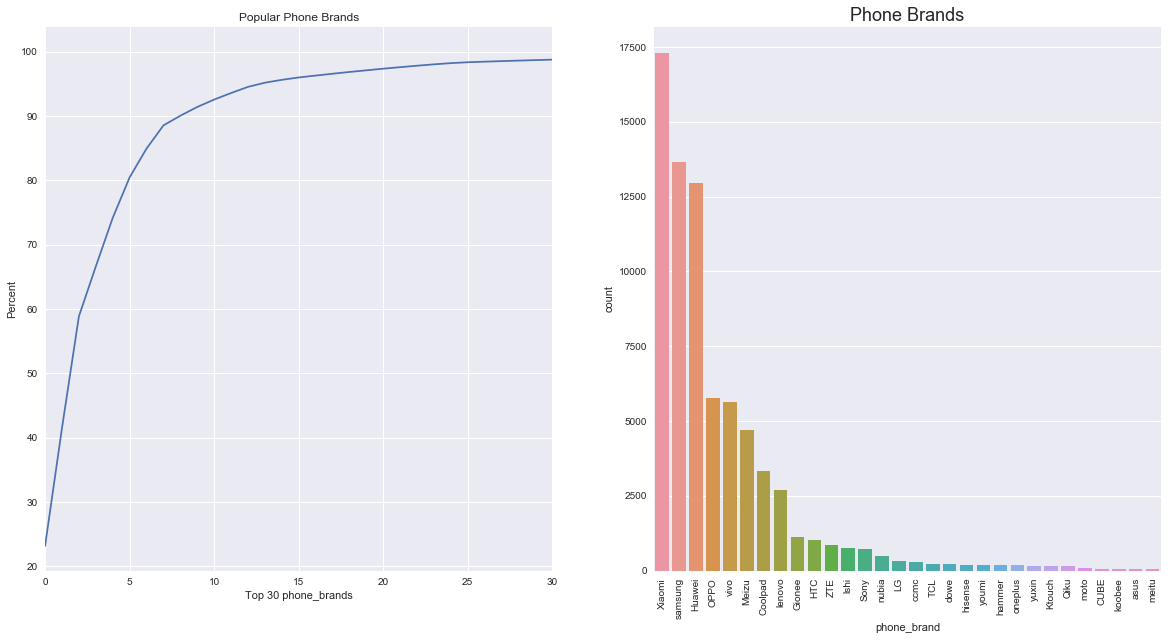

In [10]:
brand_sum= gender_age_phone_train['phone_brand'].value_counts()
brand_cumpercent = brand_sum.cumsum()/brand_sum.sum()
phone_order = gender_age_phone_train['phone_brand'].value_counts().index

fig = plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(np.arange(gender_age_phone_train['phone_brand'].nunique()) , brand_cumpercent.values*100)
plt.xlabel('Top 30 phone_brands')
plt.ylabel('Percent')
plt.title('Popular Phone Brands')
plt.xlim(0,30)

plt.subplot(1,2,2)
sns.set(font_scale=1.5)
sns.countplot(gender_age_phone_train['phone_brand'], order=phone_order[:30])
plt.xticks(rotation=90)
plt.title('Phone Brands')


In [25]:
columns =  gender_age_phone_train['phone_brand'].value_counts().index[:50]

index = ['M22-','M23-26','M27-28','M29-31','M32-38', 'M39+','F23-','F24-26','F27-28','F29-32','F33-42','F43+']

group_model = pd.DataFrame(columns=columns, index=index)


for group in index:
    for column in columns:
        group_model[column][group] = (gender_age_phone_train[gender_age_phone_train['group']==group]['phone_brand'].value_counts()[column]/
                                     gender_age_phone_train[gender_age_phone_train['group']==group]['phone_brand'].value_counts().sum()
                                    )
    group_model[columns]=group_model[columns].astype(float)

fig = plt.figure(figsize=(20,7))
sns.heatmap(group_model, cmap = 'YlOrRd')
sns.set(font_scale=1.7)
plt.xticks(rotation=90)
plt.title('Phone Brand by Groups (%)')


KeyError: 'haier'

### Distribution of Gender and Gender/Age Group

In [12]:
male_count=len(gender_age_phone_train[gender_age_phone_train['gender']=='M'])
female_count = len(gender_age_phone_train[gender_age_phone_train['gender']=='F'])
total_count = len(gender_age_phone_train)

mf_percentage= pd.DataFrame(columns=['Male', 'Female'], index = range(1))

mf_percentage['Male']= male_count/total_count
mf_percentage['Female']=female_count/total_count

mf_percentage

,Male,Female
0,0.641762,0.358238


In [18]:
groups = ['M23-26', 'M32-38', 'M39+', 'M22-', 'M29-31', 'M27-28', 'F33-42',
       'F23-', 'F29-32', 'F43+', 'F24-26', 'F27-28']

group_percentage = pd.DataFrame(columns=groups, index=range(1))

for group in groups:
    group_percentage[group]=(len(gender_age_phone_train[gender_age_phone_train['group']==group])/
                             len(gender_age_phone_train)
                            )

group_percentage

,M23-26,M32-38,M39+,M22-,M29-31,M27-28,F33-42,F23-,F29-32,F43+,F24-26,F27-28
0,0.128674,0.126946,0.114956,0.100327,0.097915,0.072944,0.074498,0.067653,0.061999,0.056185,0.056132,0.04177


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

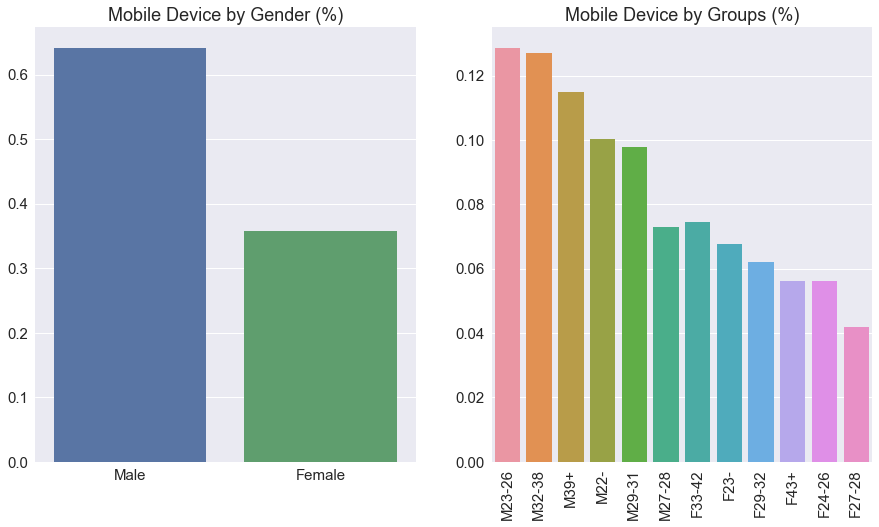

In [17]:
fig = plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.set(font_scale=1.5)
sns.barplot(data=mf_percentage[['Male','Female']])
plt.title('Mobile Device by Gender (%)')


plt.subplot(1,2,2)
sns.set(font_scale=1.5)
sns.barplot(data = group_percentage )
plt.title('Mobile Device by Groups (%)')
plt.xticks(rotation=90)

# Popular Models 

In [31]:
# Adding new column with brand and model concatenated 
gender_age_phone_train['device_model'] = gender_age_phone_train['phone_brand'].str.cat(':'+gender_age_phone_train['device_model'])

### Top 50 Phone Model

In [32]:
gender_age_phone_train.head()

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,Xiaomi,Xiaomi:MI 2
1,-2897161552818060146,M,35,M32-38,Xiaomi,Xiaomi:MI 2
2,-8260683887967679142,M,35,M32-38,Xiaomi,Xiaomi:MI 2
3,-4938849341048082022,M,30,M29-31,Xiaomi,Xiaomi:红米note
4,245133531816851882,M,30,M29-31,Xiaomi,Xiaomi:MI 3


In [33]:
columns =  gender_age_phone_train['device_model'].value_counts().index[:50]

index = ['M22-','M23-26','M27-28','M29-31','M32-38', 'M39+','F23-','F24-26','F27-28','F29-32','F33-42','F43+']

group_model = pd.DataFrame(columns=columns, index=index)


for group in index:
    for column in columns:
        group_model[column][group] = (gender_age_phone_train[gender_age_phone_train['group']==group]['device_model'].value_counts()[column]/
                                     gender_age_phone_train[gender_age_phone_train['group']==group]['device_model'].value_counts().sum()
                                    )
    group_model[columns]=group_model[columns].astype(float)

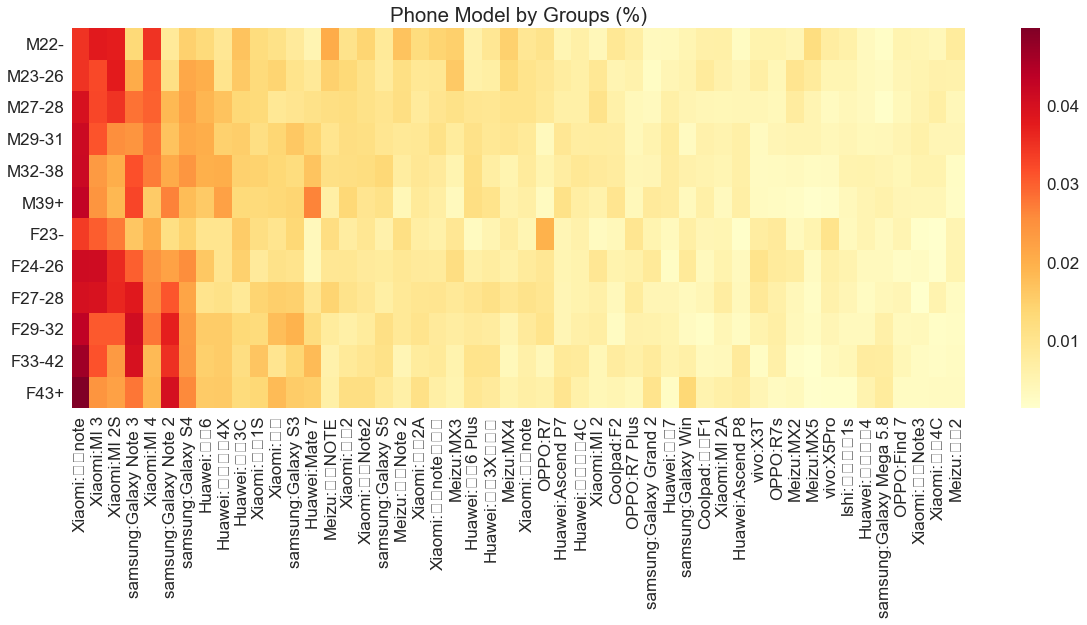

In [34]:
fig = plt.figure(figsize=(20,7))
sns.heatmap(group_model, cmap = 'YlOrRd')
sns.set(font_scale=1.7)
plt.xticks(rotation=90)
plt.title('Phone Model by Groups (%)')

### Top 10 Phone Models for each Group

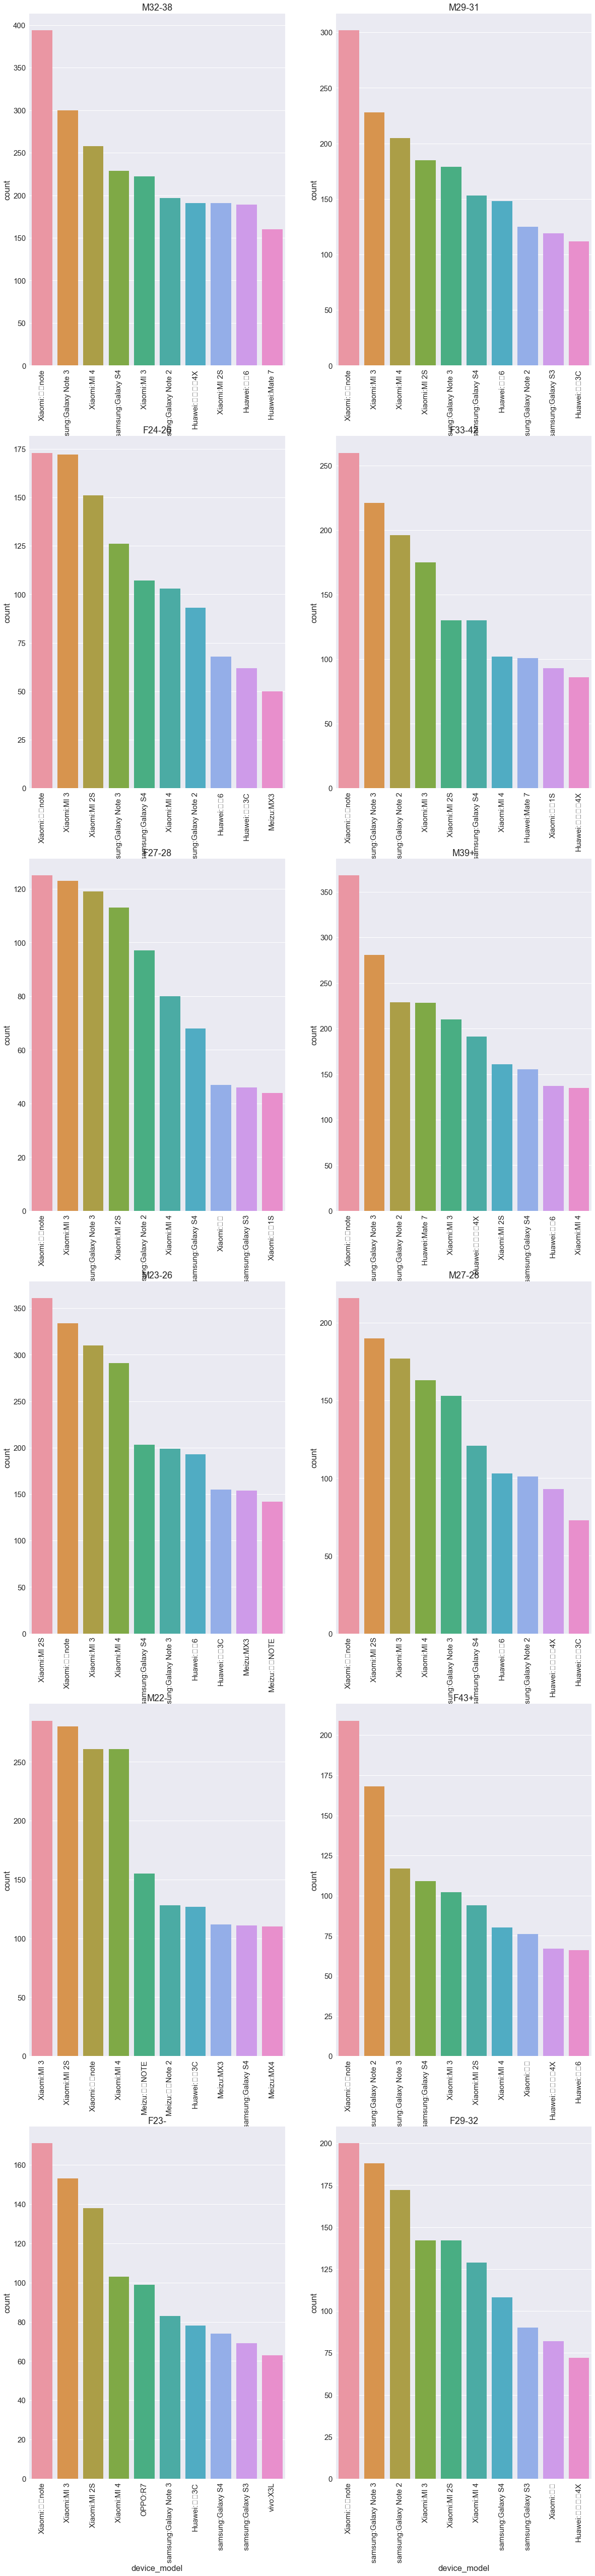

In [36]:
groups = gender_age_phone_train['group'].unique()

fig = plt.figure(figsize=(20,90))
sns.set(font_scale=1.5)
for i, group in enumerate(groups):
    plt.subplot(6,2,i+1)
    sns.countplot(gender_age_phone_train[gender_age_phone_train['group']==group]['device_model'], 
                  order= ( gender_age_phone_train[gender_age_phone_train['group']==group]
                          ['device_model'].value_counts().index[:10] 
                         )
                 )
    plt.xticks(rotation=90)
    plt.title(group)
     

In [ ]:

gender_age_phone_train[gender_age_phone_train['group']=='M22-']['device_model'].value_counts()[column]

In [75]:
gender_age_phone_train['phone_brand'].value_counts().index[:50]

Index(['Xiaomi', 'samsung', 'Huawei', 'OPPO', 'vivo', 'Meizu', 'Coolpad',
       'lenovo', 'Gionee', 'HTC', 'ZTE', 'lshi', 'Sony', 'nubia', 'LG', 'ccmc',
       'TCL', 'dowe', 'hisense', 'youmi', 'hammer', 'oneplus', 'yuxin',
       'Ktouch', 'Qiku', 'moto', 'CUBE', 'koobee', 'asus', 'meitu', 'ZUK',
       'ipair', 'bodao', 'fks', 'aiyouni', 'heymi', 'mengmi', 'mige', 'Opssom',
       'Yitong', 'panosonic', 'Konka', 'nokia', 'newman', 'yougo', 'nibilu',
       'Bifer', 'kupo', 'haier', 'lingyun'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

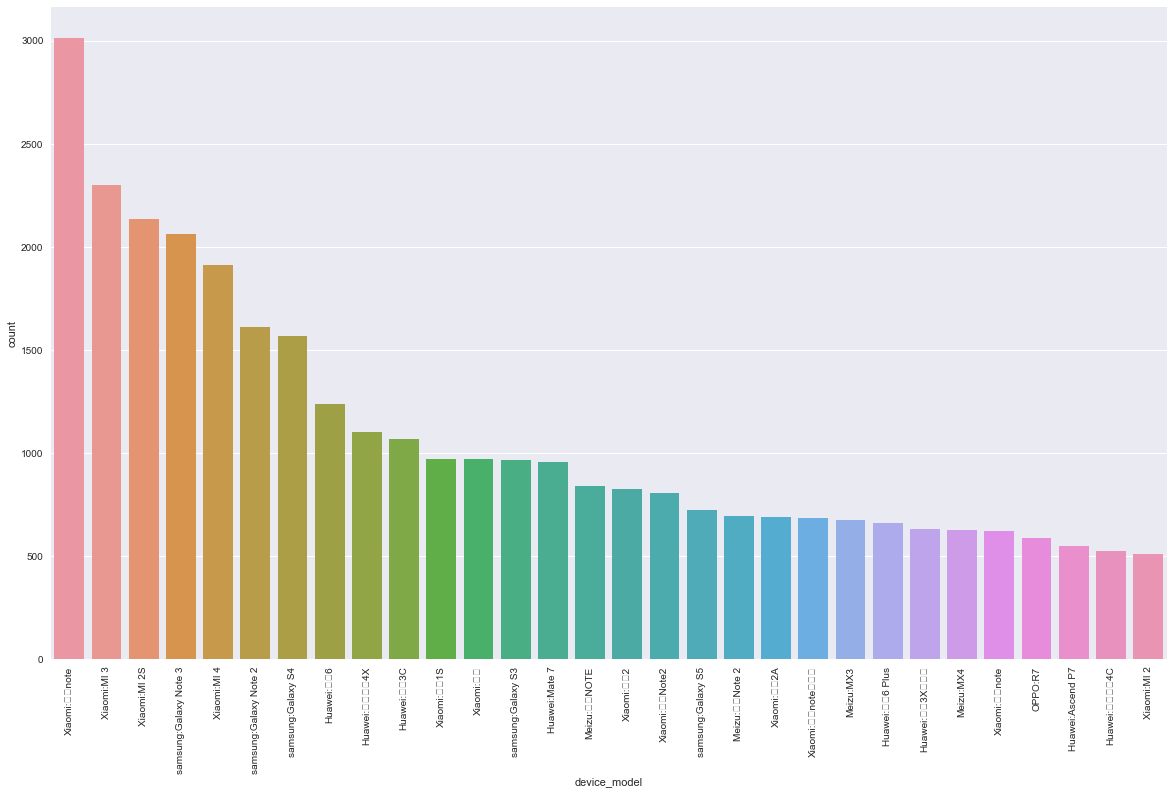

In [137]:
order = gender_age_phone_train['device_model'].value_counts().index
fig = plt.figure(figsize=(20,12))

sns.countplot(gender_age_phone_train['device_model'], order= order[:30])
plt.xticks(rotation=90)